Neural network classification

In [5]:

import sklearn


from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [6]:

len(X), len(y)


(1000, 1000)

In [7]:

print(f"First 5 samples of X:\n {X[:5]}")
print(f"First 5 samples of y:\n {y[:5]}")

First 5 samples of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y:
 [1 1 1 1 0]


In [8]:
# Make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
                        "X2": X[:, 1],
                        "label": y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


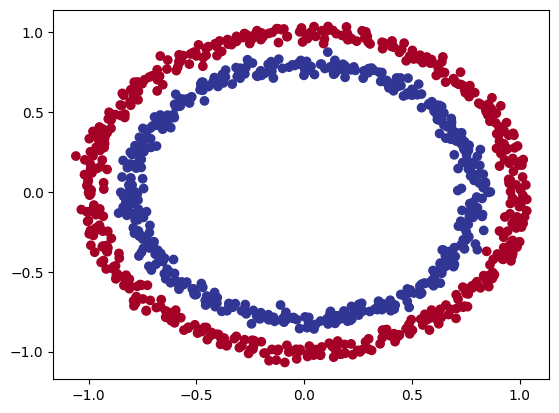

In [9]:

# Visualize, visualize, visualize
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu);

1.1 Check input and output shapes

In [10]:

X.shape, y.shape

((1000, 2), (1000,))

In [11]:

# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")


Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


1.2 Turn data into tensors and create train and test splits

In [12]:

import torch
torch.__version__

'1.13.1+cpu'

In [13]:

type(X), X.dtype

(numpy.ndarray, dtype('float64'))

In [14]:

# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]


(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [15]:

# Split data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, # 0.2 = 20% of data will be test & 80% will be train
                                                    random_state=42)

In [16]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [17]:
n_samples

1000

# 2. Building a model
Let's build a model to classify our blue and red dots.

To do so, we want to:

Setup device agonistic code so our code will run on an accelerator (GPU) if there is one
Construct a model (by subclassing nn.Module)
Define a loss function and optimizer
Create a training and test loop

In [18]:

# Import PyTorch and nn
import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device


'cpu'

In [19]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

Now we've setup device agnostic code, lets create a model that:

1/ subclasses nn.Module (almost all models in pytorch subclass nn.Module)
2. Create 2 nn. Linear() (layers that are capable of handling the shapes of our data
3. Defines a forward() method that outlines the forward pass (or forward computation) of the model
4. instatiate/confirm an instance of our model class and send it to the target device

In [20]:

from sklearn import datasets
# 1 construct a model that subclasses nn.module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    #2. create 2 nn.Linear layers capable of handling the shapes of our data
    self.layer_1 = nn.Linear(in_features=2, out_features=5) #takes in 2 features and upscale to 5
    self.layer_2 = nn.Linear(in_features=5, out_features=1) #takes in 5 features from previous layer and outputs a single features (same shape as y)

# 3. define a forward() method that outlines the forward pass
  def forward(self,x):
    return self.layer_2(self.layer_1(x)) #x --> layer_1 --> layer_2 -> output

#4. instantiate an instance of out model class and send it to the target device
model_0 = CircleModelV0().to(device)
model_0



CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [21]:

from sklearn import datasets
# 1. Construct a model that subclasses nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # 2. Create 2 nn.Linear layers capable of handling the shapes of our data
    self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features and upscales to 5 features
    self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features from previous layer and outputs a single feature (same shape as y)

  # 3. Define a forward() method that outlines the forward pass
  def forward(self, x):
    return self.layer_2(self.layer_1(x)) # x -> layer_1 ->  layer_2 -> output

# 4. Instantiate an instance of our model class and send it to the target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [22]:
device

'cpu'

In [23]:
next(model_0.parameters()).device

device(type='cpu')

In [24]:
# hiermee doe je hetzelfde maar dan korter, zonder dat je de layers en forward pass kan aanpassen
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
  ).to(device)

model_0



Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [25]:
model_0.state_dict()


OrderedDict([('0.weight',
              tensor([[-0.0413, -0.6595],
                      [ 0.3763, -0.5844],
                      [ 0.6127,  0.6062],
                      [ 0.4693,  0.1956],
                      [ 0.5427, -0.6109]])),
             ('0.bias', tensor([ 0.4060, -0.6177, -0.3285, -0.4320,  0.0198])),
             ('1.weight',
              tensor([[-0.2495, -0.3335,  0.1959,  0.1898,  0.4208]])),
             ('1.bias', tensor([-0.1559]))])

In [26]:

# Make predictions
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"\nFirst 10 predictions:\n{torch.round(untrained_preds[:10])}")
print(f"\nFirst 10 labels:\n{y_test[:10]}")


Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200, 2])

First 10 predictions:
tensor([[-0.],
        [ 0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [ 0.],
        [ 0.],
        [-1.],
        [ 0.]])

First 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [27]:

X_test[:10], y_test[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

###2.1 Setup loss function and optimizer

Which loss function or optimizer should u use?

dit is probleem specifiek..

bv voor regression: MAE (mean absolute error) of MSE (mean squared error)

bv voor classificatie: binary cross entropy of categorical crosss entropie

Reminder: loss function is de meting hoe slecht het model predicties maakt.
Voor optimizers, 2 bekende zijn SGD en ADAM, pytorch heeft er heel veel.

* voor loss function gaan we torch.nn.BECWithLogitsLoss(), voor meer info zoek binary cross entropy log loss a visual explanation in google.
* voor andere optimizers zie torch.optim

In [28]:
#setup the loss function
loss_fn = nn.BCEWithLogitsLoss() #BCEWithLogitsLoss = sigmoid activation function built-ins
# deze bestaat ook, maar is iets minder goed: loss_fn = nn.BCELoss() # BCELoss = requires inputs to have gone tru the sigmoid activation functior prior to input to BCELoss

optimizer = torch.optim.SGD(params=model_0.parameters(),
                             lr=0.1)

In [29]:
#calculeer de accuracy  - van 100 examples, hoeveel procent heeft onze model gelijk?
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred). sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

## 3. Train model

Om onze model te trainen, hebben we een training loop nodig:

1. forward pass
2. calculate the loss
3. optimizer zero grad
4. loss backward (backpopagation)
5. optimizer step (gradient descent)

### 3.1 van Raw logits --> prediction probabilities --> prediction labels

onze model output gaan raw **logits** zijn.
We gaan deze logits converteren naar predicion probabilities door er een functie over te activeren (vb sigmoid voor binaire classificatie en softmax voor multiclass classificatie).

Daarna kunnen onze model prediction probabilities converteren naar ** prediction labels** door het af te ronden of the argmax() te nemen.

In [30]:
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [31]:
#laat de eerste 5 outputs van de forward pass zien op de test data
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.1338],
        [ 0.0637],
        [-0.4969],
        [-0.0316],
        [-0.2515]])

In [32]:
y_test[:5]


tensor([1., 0., 1., 0., 1.])

In [33]:
# je ziet hierboven dat het niet hetzelfde is he, dus dit moeten we ff gaan veranden
# gebruik de sigmoid activatie op onze model logits om het te veranderen naar pred probs te veranderen
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs


tensor([[0.4666],
        [0.5159],
        [0.3783],
        [0.4921],
        [0.4374]])

In [34]:
torch.round(y_pred_probs)

tensor([[0.],
        [1.],
        [0.],
        [0.],
        [0.]])

bam en het is nu hetzelfde
voor onze predictie probability waarden hebben we een range-style gebruikt om het af te ronden:
* y_pred_probs >= 0.5, y=1 (class 1)
* y_pred_probs < 0.5, y=0 (class 0)

In [35]:
#vind de predicted labels,
y_preds = torch.round(y_pred_probs)

# volledig
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

#check voor equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

#get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([0., 1., 0., 0., 0.])

In [36]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

### Maak een training en test loop

In [37]:
torch.manual_seed(42)

torch.cuda.manual_seed(42)

#set the number of epochs
epochs = 100

#put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

#build training and evaluation loop
for epoch in range (epochs):
  ### Traning
  model_0.train()

  #1. forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits --> pred probs --> pred labels

  #2. calculeer the loss/accuracy
  #loss = loss_fn(torch.sigmoid(y_logits), # nn.BCEloss expects prediction probalilities as input, dit is niet zo handig, want dan moet je het weer gaan transformeren
  #                           y_train)
  loss = loss_fn(y_logits, # nn.BCEWithLogitsLoss expects raw logits as input
                 y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  #3. optimizer zero grad
  optimizer.zero_grad()

  #4. loss backward (backpropagation)
  loss.backward()

  #5. optimizer step (gradient descent)
  optimizer.step()

  ### testing

  model_0.eval()
  with torch.inference_mode():
    #1. Forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    #2. calculate the loss/accuracy
    test_loss = loss_fn(test_logits,
                       y_test)
    test_acc = accuracy_fn(y_true = y_test,
                           y_pred = test_pred)

    #print out whats happenin
    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc {acc:.2f}% | Test loss: {test_loss:.5f}, test acc: {test_acc:.2f}")


Epoch: 0 | Loss: 0.70420, Acc 47.50% | Test loss: 0.71362, test acc: 49.00
Epoch: 10 | Loss: 0.69825, Acc 49.25% | Test loss: 0.70687, test acc: 47.50
Epoch: 20 | Loss: 0.69604, Acc 50.38% | Test loss: 0.70372, test acc: 47.50
Epoch: 30 | Loss: 0.69506, Acc 50.62% | Test loss: 0.70189, test acc: 47.50
Epoch: 40 | Loss: 0.69451, Acc 50.88% | Test loss: 0.70063, test acc: 47.50
Epoch: 50 | Loss: 0.69416, Acc 51.00% | Test loss: 0.69969, test acc: 47.50
Epoch: 60 | Loss: 0.69391, Acc 50.88% | Test loss: 0.69894, test acc: 47.00
Epoch: 70 | Loss: 0.69372, Acc 51.00% | Test loss: 0.69833, test acc: 47.50
Epoch: 80 | Loss: 0.69357, Acc 51.12% | Test loss: 0.69783, test acc: 47.00
Epoch: 90 | Loss: 0.69345, Acc 51.25% | Test loss: 0.69740, test acc: 47.00


## 4. Make prediction and evaluate the model
Dit ziet er niet zo mooi uit..
Als je kijkt waar je de dataframe hebt gemaakt, zi eje bij circle diagram dat je 500 rode puntjes hebt en 500 blauw.. dus het is wel goed verdeeld.
Het lijkt erop dat het gewoon gokt..
Laten we het visualiseren..

We gaan een nieuwe functie aanalen: 'plot_decision_boundary'
dit kan je importeren vanuit de github

In [38]:
import requests
from pathlib import Path
# download helper functions from learn pytorch repo (als het nog niet gedownload is)
if Path("helper_functions.py").is_file():
  print("helper_function.py already exists, skipping download")
else:
  print("Download helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
                         f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_function.py already exists, skipping download


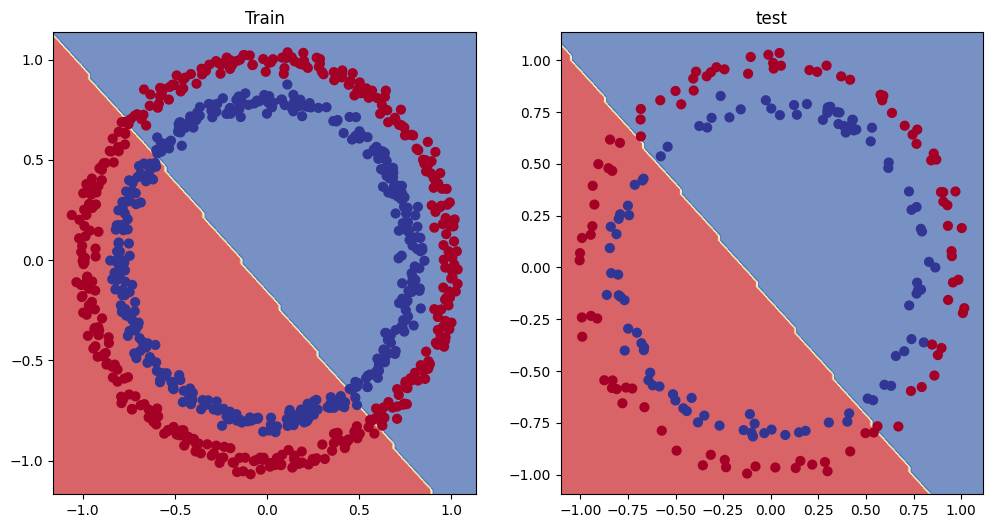

In [39]:
# plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)

plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_0, X_test, y_test)


## 5. improving a model

* add more layers - give the model more chances to learn about patterns in the data
* add more hidden units - go from 5 hidden units to 10 hidden units
* fit for longer
* changing the activation functions
* change the learning rate
* change the loss function

 mooi voorbeeld op youtube hoe je dit allemaal exact doet, 11:00:00

 Deze opties zijn allemaal vanuit de model perspectief, want deze dealt direct met het model ipv de data.

 Omdat deze opties allemaal values zijn die kunnen veranderen, worden ze gezien als **hyperparameters**. Door ons gecreeerd

LAten we beginnen met:
* adding more hidden units 5 --> 10
* increase the number of layers: 2 -> 3
* increase the number of epochs: 100 -> 1000

In [40]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, x):
#    z = self.layer_1(x)
#    z = self.layer_2(z)
#    z = self.layer_3(z)
#    return z
     return self.layer_3(self.layer_2(self.layer_1(x))) # dit is sneller

model_1 = CircleModelV1().to(device)
model_1




CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [41]:
#create a loss function + optimizer

loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.Adam(params=model_1.parameters(),
                             lr=0.0001)


In [42]:
# write a training and evaluation loop for model_1
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#set the number of epochs
epochs = 1000

#put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

#build training and evaluation loop
for epoch in range (epochs):
  ### Training
  model_1.train()

  #1. forward pass
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits --> pred probs --> pred labels

  #2. calculeer the loss/accuracy
  #loss = loss_fn(torch.sigmoid(y_logits), # nn.BCEloss expects prediction probalilities as input, dit is niet zo handig, want dan moet je het weer gaan transformeren
  #                           y_train)
  loss = loss_fn(y_logits, # nn.BCEWithLogitsLoss expects raw logits as input
                 y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  #3. optimizer zero grad
  optimizer.zero_grad()

  #4. loss backward (backpropagation)
  loss.backward()

  #5. optimizer step (gradient descent)
  optimizer.step()

  ### testing

  model_1.eval()
  with torch.inference_mode():
    #1. Forward pass
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    #2. calculate the loss/accuracy
    test_loss = loss_fn(test_logits,
                       y_test)
    test_acc = accuracy_fn(y_true = y_test,
                           y_pred = test_pred)

    #print out whats happenin
    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc {acc:.2f}% | Test loss: {test_loss:.5f}, test acc: {test_acc:.2f}")

Epoch: 0 | Loss: 0.69396, Acc 50.88% | Test loss: 0.69261, test acc: 51.00
Epoch: 10 | Loss: 0.69381, Acc 50.38% | Test loss: 0.69263, test acc: 50.50
Epoch: 20 | Loss: 0.69368, Acc 50.50% | Test loss: 0.69267, test acc: 49.50
Epoch: 30 | Loss: 0.69357, Acc 50.12% | Test loss: 0.69272, test acc: 50.00
Epoch: 40 | Loss: 0.69348, Acc 50.38% | Test loss: 0.69279, test acc: 49.00
Epoch: 50 | Loss: 0.69340, Acc 50.00% | Test loss: 0.69286, test acc: 48.50
Epoch: 60 | Loss: 0.69333, Acc 50.12% | Test loss: 0.69294, test acc: 48.00
Epoch: 70 | Loss: 0.69328, Acc 50.75% | Test loss: 0.69303, test acc: 49.00
Epoch: 80 | Loss: 0.69323, Acc 50.38% | Test loss: 0.69313, test acc: 49.50
Epoch: 90 | Loss: 0.69318, Acc 49.62% | Test loss: 0.69323, test acc: 51.50
Epoch: 100 | Loss: 0.69315, Acc 49.88% | Test loss: 0.69333, test acc: 52.00
Epoch: 110 | Loss: 0.69312, Acc 50.00% | Test loss: 0.69343, test acc: 50.00
Epoch: 120 | Loss: 0.69309, Acc 50.00% | Test loss: 0.69353, test acc: 50.00
Epoch: 130

Epoch: 660 | Loss: 0.69298, Acc 51.00% | Test loss: 0.69468, test acc: 46.00
Epoch: 670 | Loss: 0.69298, Acc 51.00% | Test loss: 0.69468, test acc: 46.00
Epoch: 680 | Loss: 0.69298, Acc 51.00% | Test loss: 0.69468, test acc: 46.00
Epoch: 690 | Loss: 0.69298, Acc 51.00% | Test loss: 0.69468, test acc: 46.00
Epoch: 700 | Loss: 0.69298, Acc 51.00% | Test loss: 0.69468, test acc: 46.00
Epoch: 710 | Loss: 0.69298, Acc 51.00% | Test loss: 0.69468, test acc: 46.00
Epoch: 720 | Loss: 0.69298, Acc 51.00% | Test loss: 0.69468, test acc: 46.00
Epoch: 730 | Loss: 0.69298, Acc 51.00% | Test loss: 0.69468, test acc: 46.00
Epoch: 740 | Loss: 0.69298, Acc 51.00% | Test loss: 0.69468, test acc: 46.00
Epoch: 750 | Loss: 0.69298, Acc 51.00% | Test loss: 0.69468, test acc: 46.00
Epoch: 760 | Loss: 0.69298, Acc 51.00% | Test loss: 0.69468, test acc: 46.00
Epoch: 770 | Loss: 0.69298, Acc 51.00% | Test loss: 0.69468, test acc: 46.00
Epoch: 780 | Loss: 0.69298, Acc 51.00% | Test loss: 0.69468, test acc: 46.00

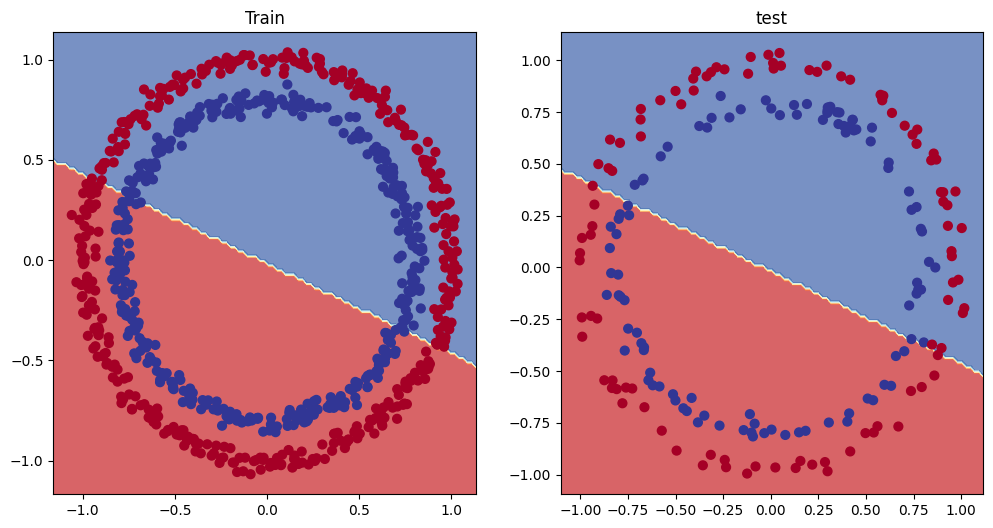

In [43]:
# plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)

plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_1, X_test, y_test)

## 5.1 preparing data to see if out model can fit a straight line
one way to troubleshoot to a larger problem is to test out a smaller problem

In [44]:
#create some data (same as notebook 01)
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

#create data
X_regression = torch.arange (start, end, step). unsqueeze(dim=-1)
y_regression = weight *X_regression + bias

#check de data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [45]:
#create train and test splits
train_split = int(0.8 * len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]


#check the lenght
len(X_train_regression), len(X_test_regression), len(y_train_regression), len(y_test_regression)

(80, 20, 80, 20)

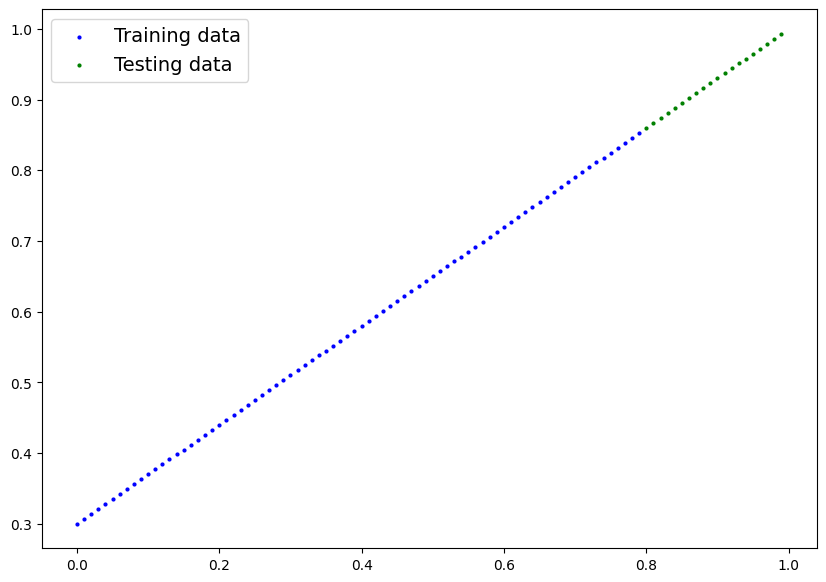

In [46]:
plot_predictions(train_data = X_train_regression,
                 train_labels = y_train_regression,
                 test_data = X_test_regression,
                 test_labels = y_test_regression)

In [47]:
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [48]:

# Same architecture as model_1 (but using nn.Sequential())
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [49]:


# Loss and optimizer
loss_fn = nn.L1Loss() # MAE loss with regression data
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.0001)

In [50]:

# Train the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put the data on the target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

# Training
for epoch in range(epochs):
  y_pred = model_2(X_train_regression)
  loss = loss_fn(y_pred, y_train_regression)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # Testing
  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(X_test_regression)
    test_loss = loss_fn(test_pred, y_test_regression)

  # Print out what's happenin'
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test loss: {test_loss:.5f}")

Epoch: 0 | Loss: 0.75986 | Test loss: 0.95353
Epoch: 100 | Loss: 0.72217 | Test loss: 0.91073
Epoch: 200 | Loss: 0.68506 | Test loss: 0.86850
Epoch: 300 | Loss: 0.64848 | Test loss: 0.82678
Epoch: 400 | Loss: 0.61238 | Test loss: 0.78551
Epoch: 500 | Loss: 0.57669 | Test loss: 0.74462
Epoch: 600 | Loss: 0.54137 | Test loss: 0.70406
Epoch: 700 | Loss: 0.50636 | Test loss: 0.66376
Epoch: 800 | Loss: 0.47162 | Test loss: 0.62366
Epoch: 900 | Loss: 0.43710 | Test loss: 0.58371


Hij doet het dus wel op lineaire modellen. No shit..

# 6.1 Recreationg non - linear data (red and blue circles)


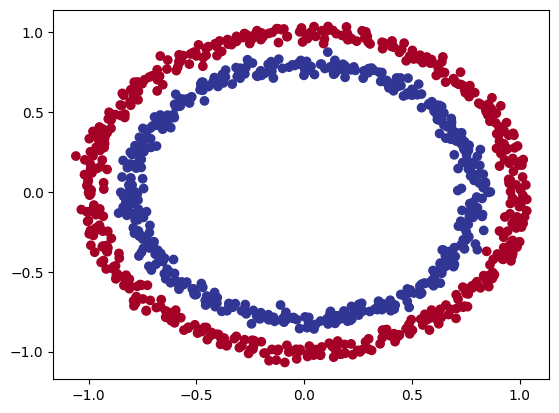

In [51]:
# laten we het hebben over non-lineaire modellen

import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X,y = make_circles(n_samples,
                   noise = 0.03,
                   random_state= 42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [52]:
# convert data to tensorts and then to train and test splits
import torch
from sklearn.model_selection import train_test_split

#turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

#split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

### 6.2 building a model with non-linearity
Artificial neural networks are a large combination of linear (straight) and non-straight (non-linear) functions which are potentially able to find patterns in data.

In [53]:
# maak een model
from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super(). __init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU() # dit is een non-linear activation function

  def forward(self, x):
      #waar zet je dan je de non-linear activation function?
      return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
model_3


CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [54]:
# setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model_3.parameters(),
                            lr=0.1)

### 6.3 Training a model

In [55]:
# random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# loop door data
epochs = 1000

for epoch in range(epochs):
  ##Training
  model_3.train()

  #1. forward pass
  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # logits --> pred prob -->

  #2. calculeer the loss
  loss = loss_fn(y_logits, y_train) # BCE with logititsloss (takes in logits as first input)
  acc = accuracy_fn(y_true = y_train,
                    y_pred = y_pred)

  #3. optimizer
  optimizer.zero_grad()

  #4. loss backward
  loss.backward()


  #5. step the optimizer
  optimizer.step()

  ###testing
  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    tes_acc = accuracy_fn(y_true = y_test,
                          y_pred = test_pred)

    # print out whats happening
    if epoch % 100 == 0:
       print(f"Epoch: {epoch} | Loss: {loss:.4f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.6929, Acc: 50.00% | Test Loss: 0.6939, Test Acc: 46.00%
Epoch: 100 | Loss: 0.0017, Acc: 100.00% | Test Loss: 0.0074, Test Acc: 46.00%
Epoch: 200 | Loss: 0.0007, Acc: 100.00% | Test Loss: 0.0054, Test Acc: 46.00%
Epoch: 300 | Loss: 0.0004, Acc: 100.00% | Test Loss: 0.0049, Test Acc: 46.00%
Epoch: 400 | Loss: 0.0003, Acc: 100.00% | Test Loss: 0.0057, Test Acc: 46.00%
Epoch: 500 | Loss: 0.0002, Acc: 100.00% | Test Loss: 0.0052, Test Acc: 46.00%
Epoch: 600 | Loss: 0.0001, Acc: 100.00% | Test Loss: 0.0051, Test Acc: 46.00%
Epoch: 700 | Loss: 0.0001, Acc: 100.00% | Test Loss: 0.0053, Test Acc: 46.00%
Epoch: 800 | Loss: 0.0001, Acc: 100.00% | Test Loss: 0.0056, Test Acc: 46.00%
Epoch: 900 | Loss: 0.0001, Acc: 100.00% | Test Loss: 0.0058, Test Acc: 46.00%


### 6.4 evaluating a model trained with non-linear activation functions


In [56]:
# precictions maken
model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10], y_test[:10]


(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

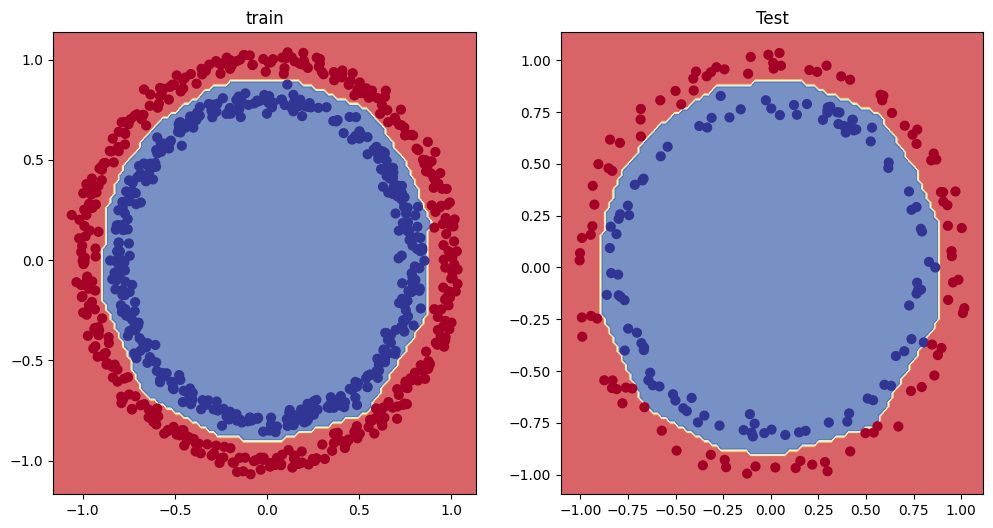

In [57]:
#plot decision boundaries
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)


## 7. Replicating non-linear activation functions
Neural networks, rather than us telling the model what to learn, we give it the tools to discover patterns in data and it tries to figure out the patterns on its own.

And these tools are linear & non-linear functions.

In [58]:
# maak een tensor
A = torch.arange(-10, 10, 1, dtype=torch.float32)
A.dtype


torch.float32

In [59]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

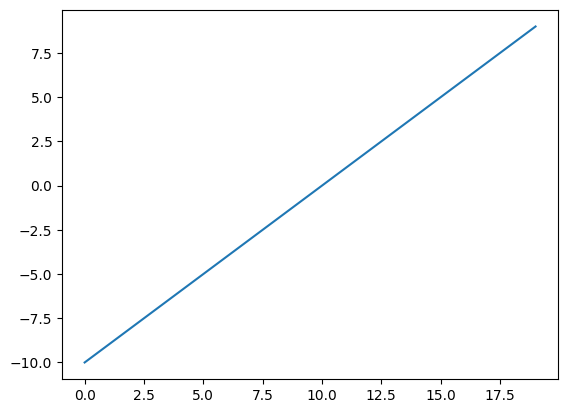

In [60]:
#visualize
plt.plot(A);

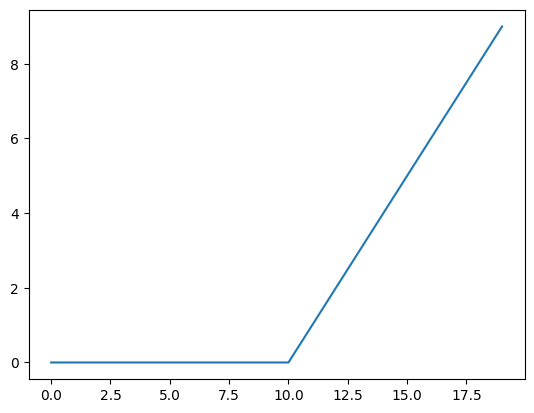

In [61]:
plt.plot(torch.relu(A));

In [62]:
def relu(x: torch.Tensor) -> torch.Tensor:
  return torch.max(torch.tensor(0), x) # input moeten tensors zijn

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

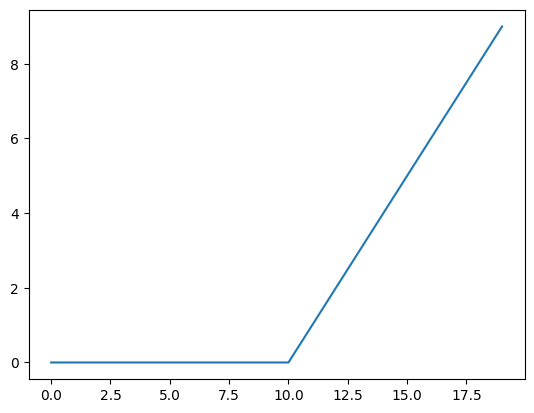

In [63]:
# plot ReLU activation functie
plt.plot(relu(A))

In [64]:
# laten we hetzelfde doen voor sigmoid
def sigmoid(x):
  return 1/(1 + torch.exp(-x))

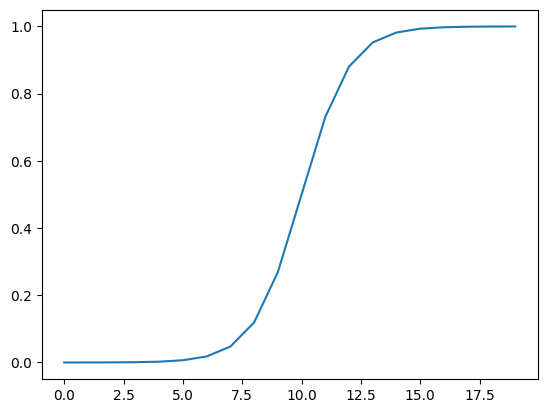

In [65]:
plt.plot(torch.sigmoid(A));

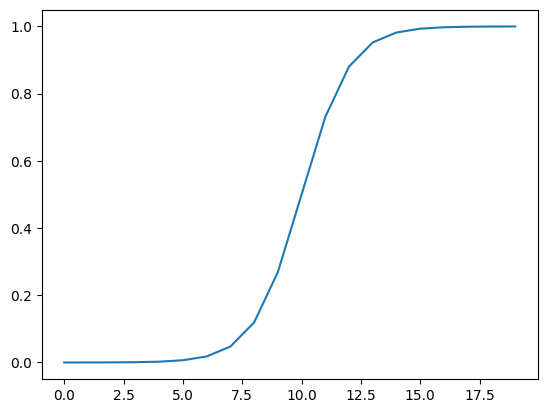

In [66]:
plt.plot(sigmoid(A));

# 8. Putting it all together met multi-class classification probleem
* binary classificatie = 1 of het ander
*multi-class classificatie = meer dan 1 ding ( cat vs dog vs fish)

#maak een toy multi-class dataset

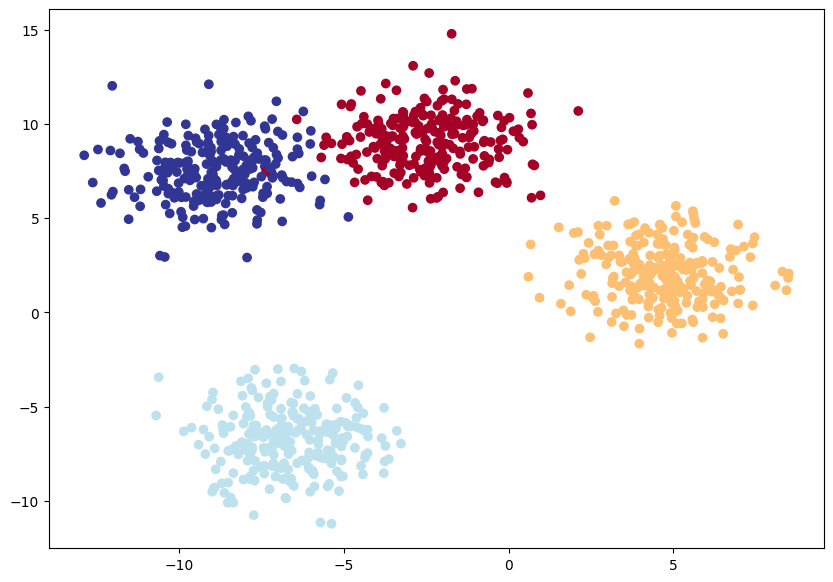

In [67]:
#import dependecies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs # google make_blobs
from sklearn.model_selection import train_test_split

#SET THE HYPERPARAMETERS VOOR DATA CREATIE
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

#1. CREATE MULTICLASS DATA
X_blob, y_blob = make_blobs (n_samples=1000,
                             n_features= NUM_FEATURES,
                             centers = NUM_CLASSES,
                             cluster_std = 1.5,
                             random_state = RANDOM_SEED)

#maak data van eerste in tensors
X_blod = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.float)

#split
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size=0.2,
                                                                        random_state= RANDOM_SEED)

# plot data
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0], X_blob[:,1], c=y_blob, cmap=plt.cm.RdYlBu);

In [68]:
# 8.2 building a multi-class classification model

In [69]:
#create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [70]:
#build a multi-class classification model
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    """initializes multi-class classification model.

    Args:
    super().__init__()

SyntaxError: EOF while scanning triple-quoted string literal (4218396573.py, line 7)

In [ ]:
test gittt